### **Load libraries**

In [1]:
import sys
sys.path.append('../src')
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import risk_kit as rk
from mgarch import mgarch
import importlib

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### **Load data**

In [4]:
rets = pd.read_csv('selected_stocks_rets.csv', index_col=0)
stocks = pd.read_csv('selected_stocks_stocks.csv', index_col=0)

In [5]:
expected_returns = pd.read_csv('expected_returns.csv', index_col=0, header=None).iloc[:,0]
expected_covmat = pd.read_csv('expected_covmat.csv', index_col=0)

In [6]:
# Define the number of periods per year for all calculations
# 252 is an approximation for daily
# 54 for weekly
# 12 for monthly
periods_per_year = 54

# **Initial examination**

In [7]:
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year, riskfree_rate=0)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
BOGOTA.CL,0.013002,0.276753,-0.813516,13.288803,0.061399,0.096779,0.046982,-0.633000
BVC.CL,0.116595,0.253035,0.681931,7.179835,0.044130,0.069545,0.460786,-0.356135
CELSIA.CL,0.125668,0.282956,2.286295,23.147095,0.015975,0.075304,0.444127,-0.492160
CIBEST.CL,0.163538,0.358830,0.266150,15.104411,0.060624,0.097583,0.455753,-0.581655
CNEC.CL,-0.131962,0.399117,2.759476,31.697829,0.008750,0.102332,-0.330635,-0.923684
CORFICOLCF.CL,-0.006758,0.290366,0.059902,8.108513,0.059587,0.092212,-0.023273,-0.600359
ECOPETROL.CL,0.100419,0.388548,-0.262544,9.198930,0.081035,0.114029,0.258446,-0.615934
ENKA.CL,0.071172,0.395772,1.943080,14.348640,0.040042,0.099571,0.179830,-0.562287
EXITO.CL,-0.008563,0.348584,1.099388,12.055399,0.052517,0.103810,-0.024566,-0.659980
GEB.CL,0.131959,0.238484,0.399422,7.904444,0.043567,0.069989,0.553325,-0.478890


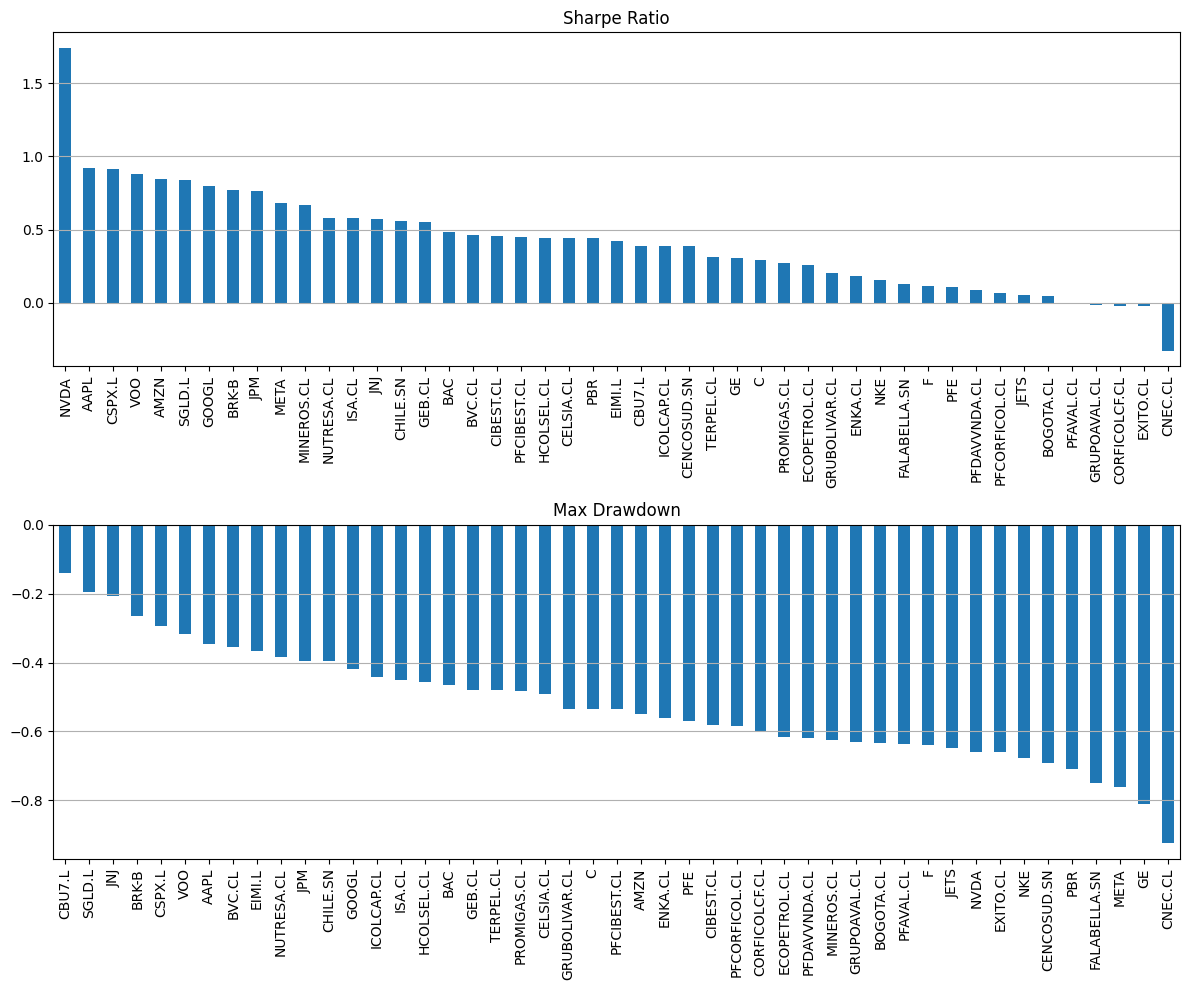

In [8]:
# Plot some return, volatility, and risk rankings to get a view of relevant stocks
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year)
#plot1_series = summary_stats['Annualized Return'].sort_values(ascending=False)
#plot2_series = summary_stats['Annualized Volatility'].sort_values(ascending=True)
#plot1_series = summary_stats['Cornish-Fisher VaR (5%)'].sort_values(ascending=False)
#plot2_series = summary_stats['Historic CVaR (5%)'].sort_values(ascending=False)
plot1_series = summary_stats['Sharpe Ratio'].sort_values(ascending=False)
plot2_series = summary_stats['Max Drawdown'].sort_values(ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plot1_series.plot.bar(ax = axes[0], legend=False, title=plot1_series.name)
plot2_series.plot.bar(ax=axes[1], legend=False, title=plot2_series.name)
axes[0].grid(axis='y')
axes[1].grid(axis='y')
plt.tight_layout()

In [9]:
# Identify stock pairs with very high correlation

# Generate correlation matrix
corr_mat = rets.corr()
# Generate a mask to exclude  duplicated pairs
#mask = np.triu(np.ones_like(corr_mat))
#corr_mat = corr_mat*mask
# Convert the matrix into a dataframe structured as a list of pairs with their respective correlations
stack_corr = pd.DataFrame(corr_mat.stack())
stack_corr = stack_corr[stack_corr[0] < 1]
stack_corr = stack_corr[stack_corr[0] != 0]
stack_corr.index.names = ['Stock 1', 'Stock 2']
stack_corr.reset_index(inplace=True)
#(abs(stack_corr[0]) > .7).sum()

# Filter to visualize only the pairs with very high correlations
high_corrs = stack_corr[stack_corr[0] >= 0.8].sort_values(by=0, ascending=False)
high_corrs

,Stock 1,Stock 2,0
1471,CSPX.L,VOO,0.922130
2147,VOO,CSPX.L,0.922130
1188,BAC,JPM,0.892528
1819,JPM,BAC,0.892528
1176,BAC,C,0.868038
1267,C,BAC,0.868038
1280,C,JPM,0.864158
1821,JPM,C,0.864158
155,CIBEST.CL,PFCIBEST.CL,0.853232
831,PFCIBEST.CL,CIBEST.CL,0.853232


In [10]:
# Check the average correlation coefficient of each stock
stack_corr.groupby('Stock 1')[0].mean().sort_values(ascending=False)

Stock 1
VOO              0.375543
ICOLCAP.CL       0.363689
CSPX.L           0.363068
C                0.329560
HCOLSEL.CL       0.322285
EIMI.L           0.320758
JETS             0.310364
PFCIBEST.CL      0.305185
JPM              0.298859
CIBEST.CL        0.293741
PFAVAL.CL        0.293279
BRK-B            0.290415
BAC              0.290058
PFDAVVNDA.CL     0.274260
ECOPETROL.CL     0.263578
F                0.262647
GE               0.256205
NKE              0.245111
CORFICOLCF.CL    0.244618
GOOGL            0.231558
AAPL             0.222457
ISA.CL           0.220355
PBR              0.217078
BOGOTA.CL        0.203756
GRUPOAVAL.CL     0.200869
NVDA             0.198022
META             0.195564
AMZN             0.193000
JNJ              0.191166
CELSIA.CL        0.189061
CENCOSUD.SN      0.182369
FALABELLA.SN     0.171191
GRUBOLIVAR.CL    0.168470
MINEROS.CL       0.166727
PFCORFICOL.CL    0.166159
PFE              0.158943
GEB.CL           0.153262
TERPEL.CL        0.126388
EXIT

# **Identify Combination with the maximum Sharpe-Ratio**

In [11]:
# Based on historical returns
n_periods = 162
# returns = rk.summary_stats(rets.iloc[-n_periods:], periods_per_year=periods_per_year)['Annualized Return']
# covmat = rets.iloc[-n_periods:].cov()

# Based on predicted returns
returns = expected_returns
covmat = expected_covmat

In [12]:
# Loop that calculates the combination that maximizes the Sharpe ratio several times until no stock has less than 5% of weight
rf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%
max_weight = 0.4 # The maximum weight allowed for a stock
initial_weights = rk.msr_tuned(riskfree_rate=rf_rate,
                         returns=returns,
                         covmat=covmat,
                         max_weight=max_weight,
                         periods_per_year=periods_per_year)
optimal_allocation = pd.DataFrame(data=initial_weights, index=returns.index, columns=['Weights']).sort_values(by='Weights')

while optimal_allocation.min().values < .05:
    optimal_allocation = optimal_allocation[1:]
    weights = rk.msr_tuned(riskfree_rate=rf_rate,
                     returns=returns[optimal_allocation.index],
                     covmat=covmat.loc[optimal_allocation.index, optimal_allocation.index],
                     max_weight=max_weight,
                     periods_per_year=periods_per_year)
    optimal_allocation = pd.DataFrame(data=weights, index=optimal_allocation.index, columns=['Weights']).sort_values(by='Weights')

chosen_allocation = optimal_allocation
chosen_allocation

,Weights
0,
BVC.CL,0.075477
TERPEL.CL,0.090607
JNJ,0.111377
SGLD.L,0.172489
JPM,0.270473
GRUBOLIVAR.CL,0.279578


In [13]:
"""
# Alternative methodology finding the combination that maximizes the Sharpe ratio and then removing any stock with a weight below 5%
rf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%

weights = rk.msr(riskfree_rate=rf_rate, return_series=rets, periods_per_year=periods_per_year)
optimal_allocation = pd.DataFrame(data=weights.round(4), index=rets.columns, columns=['Weights'])
optimal_allocation = optimal_allocation[optimal_allocation['Weights'] >= .05]

# Reduce the portfolio stocks to only those for which shares of over 3% is recommended
chosen_allocation = optimal_allocation[optimal_allocation['Weights'] > .05]
chosen_allocation = chosen_allocation / chosen_allocation.sum()
chosen_allocation.sort_values(by='Weights')
"""

"\n# Alternative methodology finding the combination that maximizes the Sharpe ratio and then removing any stock with a weight below 5%\nrf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%\n\nweights = rk.msr(riskfree_rate=rf_rate, return_series=rets, periods_per_year=periods_per_year)\noptimal_allocation = pd.DataFrame(data=weights.round(4), index=rets.columns, columns=['Weights'])\noptimal_allocation = optimal_allocation[optimal_allocation['Weights'] >= .05]\n\n# Reduce the portfolio stocks to only those for which shares of over 3% is recommended\nchosen_allocation = optimal_allocation[optimal_allocation['Weights'] > .05]\nchosen_allocation = chosen_allocation / chosen_allocation.sum()\nchosen_allocation.sort_values(by='Weights')\n"

<Axes: xlabel='Date'>

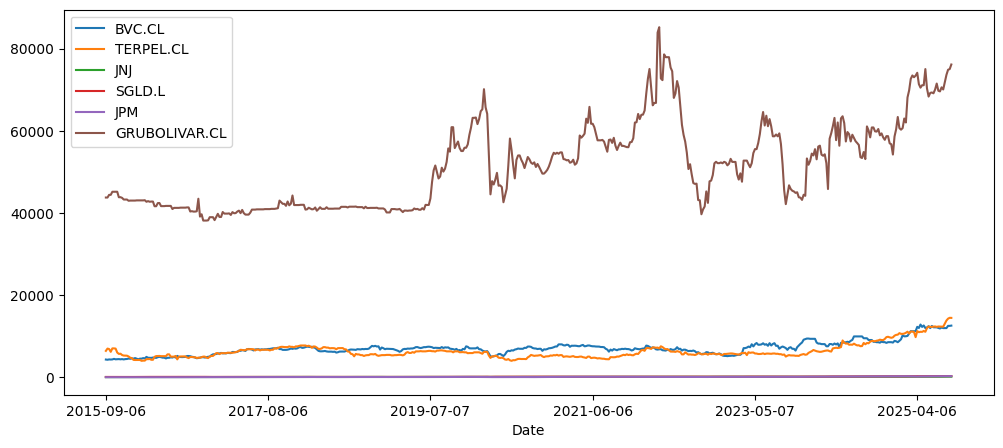

In [14]:
stocks[optimal_allocation.index].plot(figsize=(12, 5))

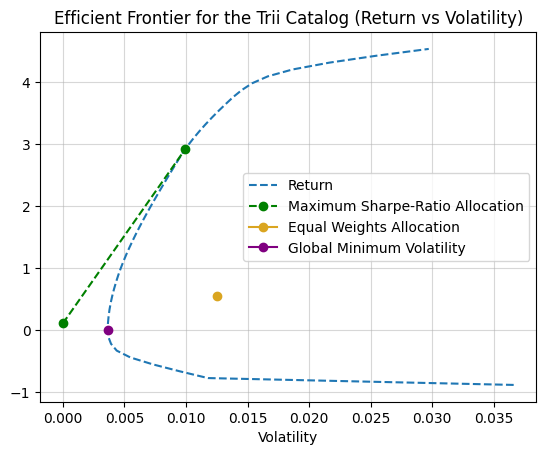

In [15]:
rk.plot_ef(50, style = '--', show_cml=True, show_ew=True, show_gmv=True, riskfree_rate=rf_rate,
           returns=returns, covmat=covmat, periods_per_year=periods_per_year)
plt.title('Efficient Frontier for the Trii Catalog (Return vs Volatility)')
plt.grid(alpha=.5)

# **Create an index for the chosen allocation**

In [16]:
# Generate a dataframe to represent the evolution of the allocation in each stock
weights = chosen_allocation['Weights']
allocated_index = (rets[weights.index] + 1).cumprod()*weights

# Add a column to represent the index
allocated_index['index'] = allocated_index.sum(axis='columns')
allocated_index.index = pd.to_datetime(allocated_index.index.str.split('/').str[0])

# Generate a row to represent an earlier period before returns are made,
# corresponding to the time when the index equal 1
first_period = allocated_index.index[0]
starting_period = first_period - pd.offsets.Week(weekday=6)   # Uncomment to generate a week starting period
#starting_period = first_period - pd.offsets.DateOffset(months=1)   # Uncomment to generate a month starting period
starting_period

allocation_start = pd.DataFrame(index=[starting_period], columns=allocated_index.columns)
allocation_start.iloc[:, :-1] = 1*weights
allocation_start['index'] = 1

# Append the row to the allocated_index dataframe
allocated_index = pd.concat([allocation_start, allocated_index], axis='rows')
allocated_index.head()

,BVC.CL,TERPEL.CL,JNJ,SGLD.L,JPM,GRUBOLIVAR.CL,index
2015-09-06,0.075477,0.090607,0.111377,0.172489,0.270473,0.279578,1.000000
2015-09-13,0.074545,0.098393,0.113353,0.169714,0.275135,0.279578,1.010718
2015-09-20,0.075943,0.096977,0.113914,0.175122,0.26801,0.283723,1.013689
2015-09-27,0.075477,0.08735,0.110999,0.176148,0.270341,0.283723,1.004039
2015-10-04,0.075943,0.099101,0.114573,0.175294,0.267439,0.288532,1.020881


In [17]:
# Generate a dataframe with the returns of the index
allocated_index_returns = (allocated_index/allocated_index.shift(1) - 1).dropna()
allocated_index_returns.head()

,BVC.CL,TERPEL.CL,JNJ,SGLD.L,JPM,GRUBOLIVAR.CL,index
2015-09-13,-0.012346,0.085937,0.017742,-0.016084,0.017236,0.0,0.010718
2015-09-20,0.01875,-0.014389,0.00495,0.031863,-0.025895,0.014827,0.002940
2015-09-27,-0.006135,-0.09927,-0.025592,0.005863,0.008697,0.0,-0.009520
2015-10-04,0.006173,0.134522,0.032198,-0.00485,-0.010737,0.016949,0.016775
2015-10-11,0.030675,0.0,0.015331,0.016676,0.025767,0.0,0.013616


In [18]:
summary_stats = rk.summary_stats(allocated_index_returns, periods_per_year=periods_per_year, riskfree_rate=0)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
BVC.CL,0.116595,0.253035,0.681931,7.179835,0.044130,0.069545,0.460786,-0.356135
TERPEL.CL,0.087368,0.280660,0.559167,8.054740,0.050357,0.084848,0.311294,-0.480604
JNJ,0.101589,0.176854,-0.243544,4.840973,0.038248,0.051708,0.574424,-0.205645
SGLD.L,0.121223,0.143984,0.094824,5.100998,0.028554,0.040355,0.841924,-0.194443
JPM,0.212908,0.277673,0.069802,7.995340,0.053297,0.082295,0.766756,-0.396032
GRUBOLIVAR.CL,0.059062,0.287702,1.183502,13.790061,0.039860,0.087203,0.205289,-0.534128
index,0.137068,0.144294,-0.746103,11.607509,0.030270,0.041971,0.949927,-0.298293


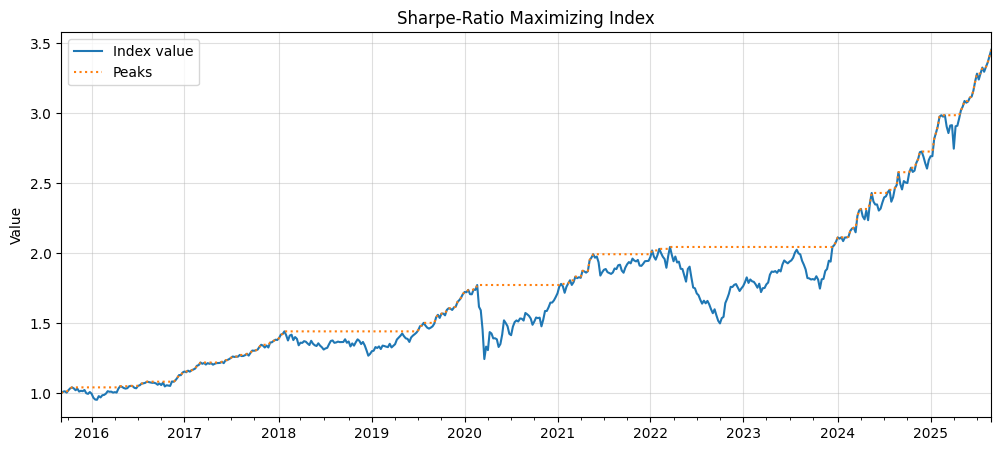

In [19]:
# Visualize the evolution of the index
allocated_index['index'].plot(figsize=(12, 5), label='Index value')
allocated_index['index'].cummax().plot(linestyle=':', label='Peaks')
plt.legend()
plt.ylabel('Value')
plt.title('Sharpe-Ratio Maximizing Index')
plt.grid(alpha=0.4)

### **Export datasets and an index for the Sharpe-Ratio maximizing allocation**

In [20]:
# Allocation index and returns
allocated_index.to_csv('allocated_index.csv')
allocated_index_returns.to_csv('allocated_index_returns.csv')